The objective of the project is to build a machine learning model to accurately predict whether or not the patients in the dataset has diabetes or not.

## Import the libraries

In [1]:
import pandas as pd
import numpy as np

### Import the dataset

In [2]:
# This dataset is downloaded from Kaggle free data source
df = pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# to know the number of rows and the columns present in the data
# in other way number of observations and features
df.shape

(768, 9)

In [5]:
# to know the information about the data eg., datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Standardizing the column names
df = df.rename(columns={'Pregnancies':'number_of_pregnancies','Glucose':'glucose','BloodPressure':'blood_pressure','SkinThickness':'skin_thickness','Insulin':'insulin','BMI':'bmi','DiabetesPedigreeFunction':'diabetes_pedigree_function','Age':'age','Outcome':'outcome'})

In [7]:
# to look into the first 5 rows of the data
df.head()

,number_of_pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Descriptive statistics

Descriptive statistics summarizes the important aspects of a given data set(population or a sample of a population).When we calculate descriptive statistics for a dataset it provides us with clues about the data such as what values are normal vs extreme and how the data is distributed.Descriptive statistics can be shown in charts or graphs.

In [8]:
# to know the descriptive statistics of numerical features
df. describe()

,number_of_pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'count of target variable per classification')

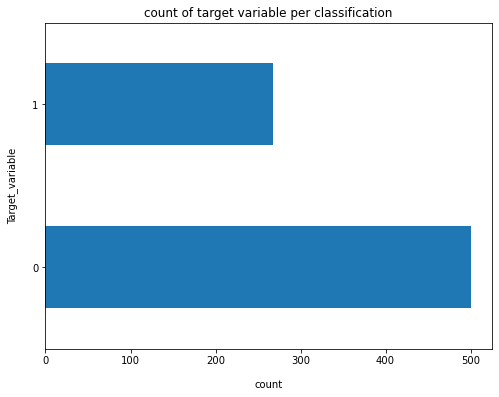

In [9]:
# the bar chart is to know the distribution of the target variable(dependant variable)
import matplotlib.pyplot as plt
df['outcome'].value_counts().plot(kind = 'barh',figsize = (8,6))
plt.xlabel('count',labelpad = 14)
plt.ylabel('Target_variable',labelpad = 14)
plt.title('count of target variable per classification')

### Inferential Statistics

Finding insights and making prdictions from a sample data of a population is known as Inferential statistics

In [10]:
# calculate the percentage of '0' and '1' in the target variable
100*df['outcome'].value_counts()/len(df['outcome'])

0    65.104167
1    34.895833
Name: outcome, dtype: float64

The inference is that the data set is imbalanced.

### Handling missing Values and duplicate records

In [11]:
df.isna().sum()

number_of_pregnancies         0
glucose                       0
blood_pressure                0
skin_thickness                0
insulin                       0
bmi                           0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64

In [12]:
duplicate = df.duplicated()
print(duplicate.sum())

0


As we do not have any null records, data cleaning is not required

## Data Exploration

In [13]:
# to know the list of features or variables
list(df.columns)

['number_of_pregnancies',
 'glucose',
 'blood_pressure',
 'skin_thickness',
 'insulin',
 'bmi',
 'diabetes_pedigree_function',
 'age',
 'outcome']

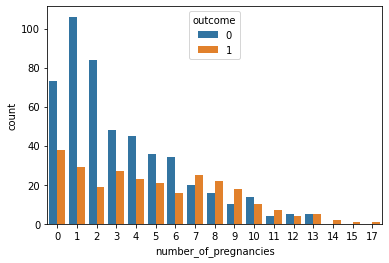

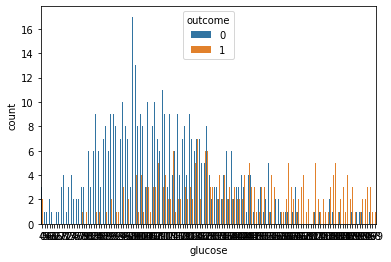

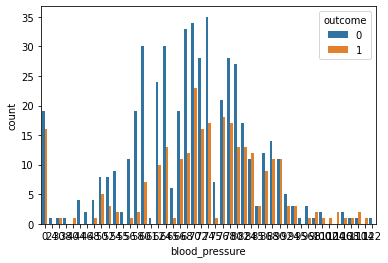

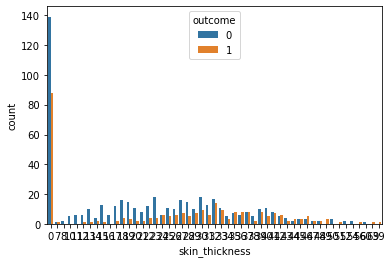

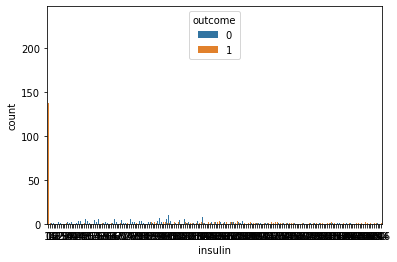

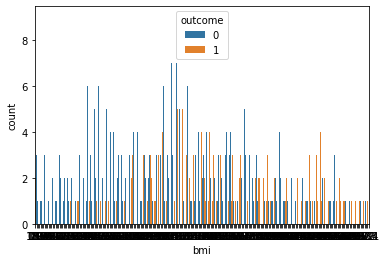

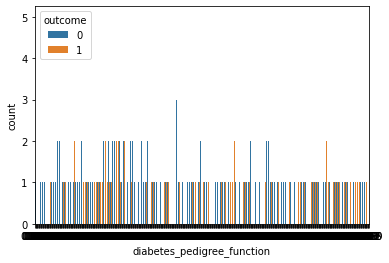

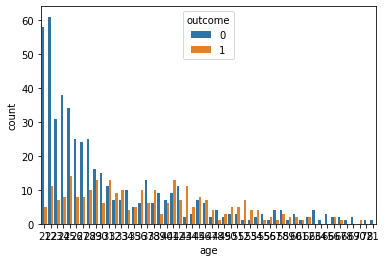

In [14]:
# having a look into the value counts of each predictor variable and their count in respect to target variable
import seaborn as sns
for i, predictor in enumerate(df.drop(columns = ['outcome'])):
    #print('-'*10, predictor,'-'*10)
    #print(df[predictor].value_counts())
    plt.figure(i)
    sns.countplot(data = df, x = predictor,hue='outcome')

## Check for multicolinearity

In [15]:
correlation = df.corr()
correlation

,number_of_pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
number_of_pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetes_pedigree_function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


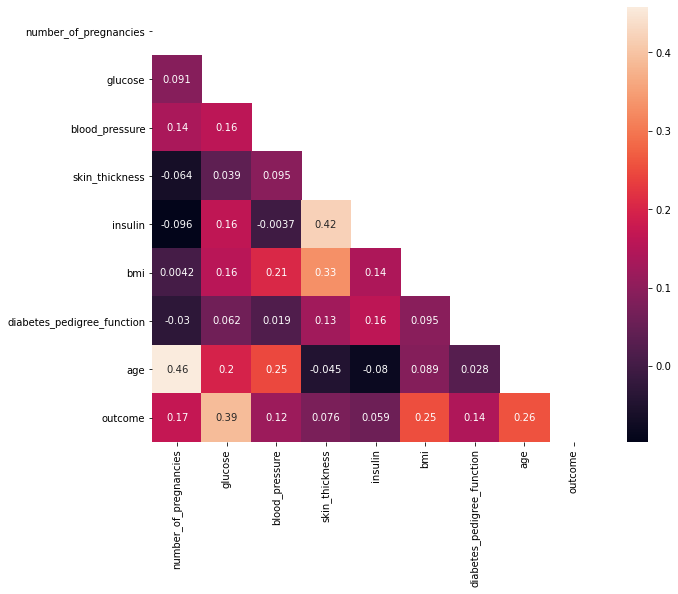

<Figure size 432x288 with 0 Axes>

In [18]:
# correlation plot
corr_matrix = df.corr(method='kendall')
fig, ax=plt.subplots(figsize=(10,8))
mask = np.triu(np.ones_like(corr_matrix,dtype=bool))
ax = sns.heatmap(corr_matrix,mask=mask,annot=True) #fmt = '.0%' to know the percentage instead value
plt.show()
plt.savefig('correlation_heatmap.png')

## Creating a machine learning model [Logistic Regression] to predict the diabetes

### Split the data set into independent and dependent datas ets

In [52]:
x= df.iloc[:,:8]
y = df.iloc[:,-1]

### Scale the numerical data

In [53]:
transformer = StandardScaler().fit(x)
scaled_x = transformer.transform(x)

### confirm the imbalance on the target variable

In [55]:
y.value_counts()

0    500
1    268
Name: outcome, dtype: int64

### Spilitting the data set into the training(80%) set and Test set(20%)

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [57]:
# define and train a LogisticRegression model
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state = 0, solver = 'lbfgs',multi_class='ovr').fit(x_train,y_train)
# creating predictions based on our traind model
y_pred = classification.predict(x_test)

C:\Users\Rajusath\anaconda3\envs\sathyaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluate the baseline model with confusion matrix

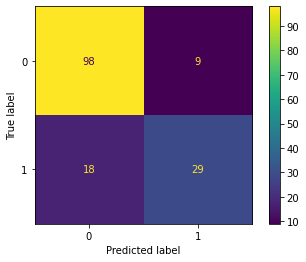

In [58]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(y_test,y_pred)
plot_confusion_matrix(classification,x_test,y_test)
plt.show()

In [59]:
# accuracy of the trained set
classification.score(scaled_x,y)

0.6510416666666666

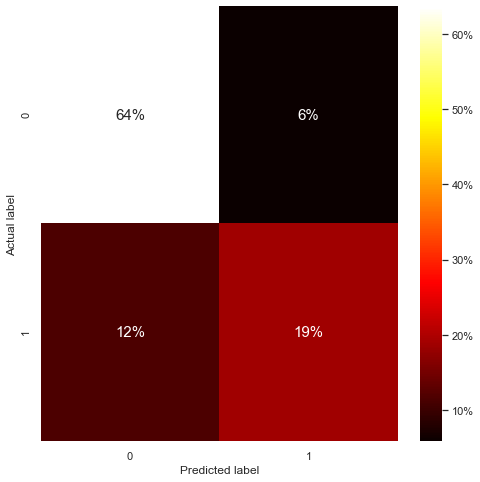

In [60]:
# % confusion matrix heat map

# shortened name
cnfmat = confusion_matrix( y_test,y_pred)

# creating a Dataframe out of our confusion matrix, easier to plot in seaborn. 
df_cm = pd.DataFrame(cnfmat, columns=np.unique(y_test), index = np.unique(y_test))

# column and index names to our df
df_cm.index.name = 'Actual label'
df_cm.columns.name = 'Predicted label'

# set the fontsize for my plot
sns.set(font_scale=1)

# set plot size
fig, ax = plt.subplots(figsize=(8,8))

# this function formatter is necessary to create a custom function which formats our values as % 
from matplotlib.ticker import FuncFormatter
fmt = lambda x,pos: '{:.0%}'.format(x)

# plot the heatmap for our confusion matrix
sns.heatmap(df_cm/df_cm.sum().sum(),  # plot the number of values as percentage of all values in the confusion matrix
            annot=True,
            fmt='.0%',
            cmap='hot',
            annot_kws={"size":15},
            cbar_kws={'format': FuncFormatter(fmt)}
           );

### Insights

1. It is evident that our model is way better in predicting the diabetes = False
patients correctly than the ones who have diabetes- because of the heavy misbalance
within the target variable of 500(No) to 268(yes)
2. Applying the oversampling technique called SMOTE(Synthetic Minority Oversampling Technique)to balance the data could improve the accuracy